# Load Data 

In [1]:
import glob, os 
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras import backend as K
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
path="images/"
imlist= glob.glob(os.path.join(path, '*.jpg'))

In [3]:
def dataset(file_list,size=(300,180),flattened=False):
	data = []
	for i, file in enumerate(file_list):
		image = io.imread(file) #, as_grey=True)
		image = transform.resize(image, size, mode='constant')
		if flattened:
			image = image.flatten()

		data.append(image)

	labels = [1 if f.split("/")[-1][0] == 'P' else 0 for f in file_list]

	return np.array(data), np.array(labels)

In [4]:
# Load the dataset (may take a few seconds)
X,y=dataset(imlist)

/home/nburns/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [5]:
# X has the following structure: X[imageid, y,x,channel]
print('X: ',X.shape)  # data
print('y: ',y.shape)  # target

X:  (714, 300, 180, 3)
y:  (714,)


In [6]:
print('Class 0: ',sum(y==0))
print('Class 1: ',sum(y==1))
print('Total  : ',len(y))
print(y)

Class 0:  345
Class 1:  369
Total  :  714
[1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0
 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0
 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1
 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1
 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0
 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1
 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0
 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0
 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0
 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0

In [7]:
%matplotlib inline 

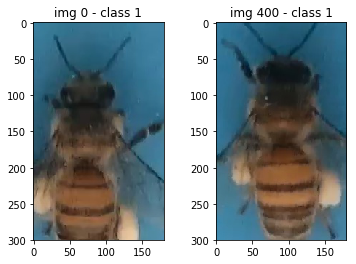

In [8]:
fig, axes = plt.subplots(1,2)
k=0
plt.sca(axes[0])
plt.imshow(X[k])
plt.title('img {} - class {}'.format(k, y[k]))

k=400
plt.sca(axes[1])
plt.imshow(X[k])
plt.title('img {} - class {}'.format(k, y[k]));

## Build the classification model  

Going to use tensorflow for this, just a quick and dirty...

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# NOTE, if grayscale, we have to add the Grayscale dimension or the input
# shape is all out of whack for keras
#x_train = x_train.reshape(x_train.shape[0], 300, 180, 1)
#x_test = x_test.reshape(x_test.shape[0], 300, 180, 1)

print("training shape: {}".format(x_train.shape))
print("testing shape: {}".format(x_test.shape))
print("There are {} training samples for 'no' and for 'yes' respectively".format(np.sum(y_train, axis=0)))

training shape: (571, 300, 180, 3)
testing shape: (143, 300, 180, 3)
There are 284 training samples for 'no' and for 'yes' respectively


In [12]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(300,180,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu',
               kernel_regularizer=keras.regularizers.l1_l2(l1=0.001, l2=0.01)))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu',
               kernel_regularizer=keras.regularizers.l1_l2(l1=0.001, l2=0.01)))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 178, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 89, 32)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 87, 64)       18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 43, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 41, 32)        18464     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 20, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 18, 32)        9248      
__________

Instructions for updating:
Use tf.cast instead.
Train on 571 samples, validate on 143 samples
Epoch 1/10
571/571 [==============================] - 36s 64ms/step - loss: 19.5450 - acc: 0.5552 - val_loss: 10.2489 - val_acc: 0.4056
Epoch 2/10
571/571 [==============================] - 35s 62ms/step - loss: 6.2910 - acc: 0.6182 - val_loss: 3.7762 - val_acc: 0.5804
Epoch 3/10
571/571 [==============================] - 35s 62ms/step - loss: 2.9826 - acc: 0.7933 - val_loss: 2.1517 - val_acc: 0.9091
Epoch 4/10
571/571 [==============================] - 35s 61ms/step - loss: 1.9683 - acc: 0.8301 - val_loss: 1.7748 - val_acc: 0.7622
Epoch 5/10
571/571 [==============================] - 36s 63ms/step - loss: 1.5523 - acc: 0.8266 - val_loss: 1.2042 - val_acc: 0.9161
Epoch 6/10
571/571 [==============================] - 35s 62ms/step - loss: 1.1975 - acc: 0.8476 - val_loss: 0.9198 - val_acc: 0.9301
Epoch 7/10
571/571 [==============================] - 35s 62ms/step - loss: 0.9821 - acc: 0.8616 - v

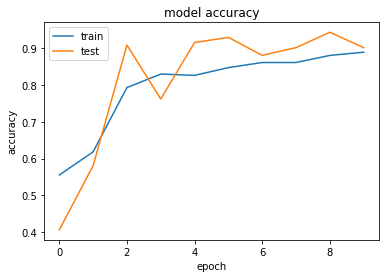

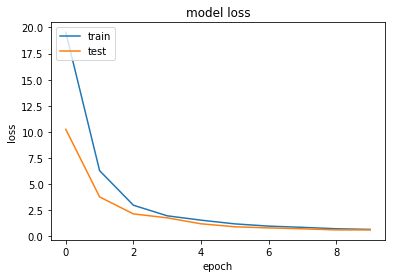

In [13]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs = 10, validation_data=(x_test,y_test))

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
model.save('bee_pollen_model.h5')